In [4]:
# Print iterations progress
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

import time

# A List of Items
items = list(range(0, 57))
l = len(items)

# Initial call to print 0% progress
printProgressBar(0, l, prefix = 'Progress:', suffix = 'Complete', length = 50)
for i, item in enumerate(items):
    # Do stuff...
    time.sleep(0.1)
    # Update Progress Bar
    printProgressBar(i + 1, l, prefix = 'Progress:', suffix = 'Complete', length = 50)

In [34]:
class_list = ['person', 'car', 'motorcycle', 'bus', 'truck']

In [35]:
coco_classes = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
        'hair drier', 'toothbrush']

In [36]:
data_type = ['train'] #, 'validation'
labels_path = '/home/mosminin/fiftyone/coco_pv_export/labels/'
images_path = '/home/mosminin/fiftyone/coco_pv_export/images/'

from pathlib import Path

for split in data_type:
    labels = Path(f'{labels_path}/{split}').glob('0*.txt')
    images = Path(f'{images_path}/{split}').glob('0*.jpg')

    labels_list = list(map(str, labels))
    images_list = list(map(str, images))
    non_cls = len(images_list) - len(labels_list)
    print('Split: ', split, ' imgs:', len(labels_list), ' lbls:', len(images_list), 'non_cls:', non_cls)

Split:  train  imgs: 18175  lbls: 18175 non_cls: 0


Progress: |██████████████████████████████████████████████████| 100.0% Complete
(6,)


<AxesSubplot: title={'center': 'train'}>

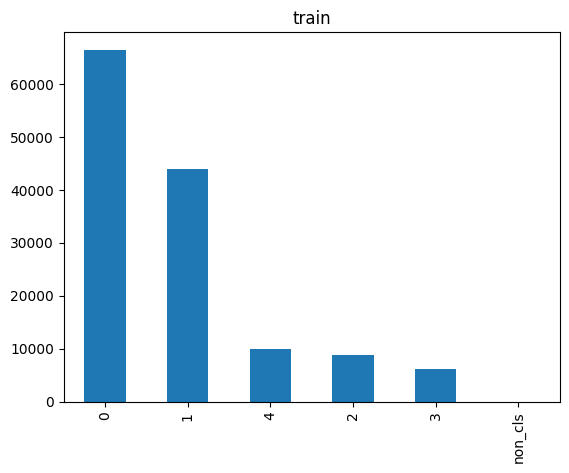

In [37]:
# importing pandas
import pandas as pd
  
file_list=labels_list
l = len(file_list)
  
main_dataframe = pd.DataFrame(pd.read_table(file_list[0], sep='\s+', header = None, engine='python'))

printProgressBar(0, l, prefix = 'Progress:', suffix = 'Complete', length = 50)
  
for i in range(1,len(file_list)):
    data = pd.read_table(file_list[i], sep='\s+', header = None, engine='python')
    df = pd.DataFrame(data) #, columns= ['cls', 'bbox_x', 'bbox_y', 'bbox_w', 'bbox_h']
    main_dataframe = pd.concat([main_dataframe,df],axis=0, ignore_index=True)
    printProgressBar(i + 1, l, prefix = 'Progress:', suffix = 'Complete', length = 50)
    
main_dataframe.columns=['cls', 'x', 'y', 'w', 'h']

# compression_opts = dict(method='zip',
#                         archive_name='out.csv')  
# main_dataframe.to_csv('out.zip', index=False,
#           compression=compression_opts)

counts_df = main_dataframe['cls'].value_counts(sort=True)
# counts_df.columns[class_list]
counts_df['non_cls']=non_cls
print(counts_df.shape)
# counts_df.append(non_cls)
counts_df.plot(kind='bar', title=f'{split}')  


In [1]:
import fiftyone as fo
dataset = fo.load_dataset('coco_pv_base')

In [3]:
session = fo.launch_app(view=dataset.view())